# Import modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read data from csv file & show information about it

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df=df.copy()

In [4]:
df.shape

(1460, 81)

# Check missing values

In [5]:
df.isnull().sum().values

array([   0,    0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    8,    8,    0,    0,    0,   37,   37,   38,
         37,    0,   38,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  690,   81,   81,   81,    0,    0,   81,   81,    0,
          0,    0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,
          0,    0,    0,    0])

# Drop unused features

In [6]:
df=df.drop('Id',axis=1)

In [7]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# classify categorical features between nominal and ordinal

In [8]:
nominal_cols = [
'MSZoning',
'Street',
'Alley','Utilities','LotConfig','Neighborhood','Condition1','Condition2',
    'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
'Foundation','Heating','CentralAir','Electrical','PavedDrive',
    'GarageType','MiscFeature','SaleType','SaleCondition'] 


ordinal_cols = ['MSSubClass','LotShape','LandContour','LandSlope','OverallQual','OverallCond',
                'ExterQual','ExterCond','BsmtQual',
                'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                'HeatingQC','KitchenQual',
                'Functional',
                'FireplaceQu','GarageFinish','GarageQual','GarageCond',
                'PoolQC','Fence']

# fill missing values and check it again

In [9]:
columns=df.columns
for col in columns:
    if df[col].dtype in ('int64','float64') and col not in ordinal_cols and col not in nominal_cols:
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        imputer = imputer.fit(df[[col]])
        df[col] = imputer.transform(df[[col]])
    else:
        mode_value = df[col].mode()[0]
        # Replace missing values with the mode value
        df[col].fillna(mode_value, inplace=True)

In [10]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Encode ordinal variables with OrdinalEncoder

In [11]:
# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()
# Fit and transform the ordinal columns
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])

# Encode nominal variables with One-hot encoding

In [12]:
encoded_df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Check new dataframe 

In [13]:
encoded_df

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.0,65.0,8450.0,3.0,3.0,0.0,6.0,4.0,2003.0,2003.0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,80.0,9600.0,3.0,3.0,0.0,5.0,7.0,1976.0,1976.0,...,0,0,0,0,1,0,0,0,1,0
2,5.0,68.0,11250.0,0.0,3.0,0.0,6.0,4.0,2001.0,2002.0,...,0,0,0,0,1,0,0,0,1,0
3,6.0,60.0,9550.0,0.0,3.0,0.0,6.0,4.0,1915.0,1970.0,...,0,0,0,0,1,0,0,0,0,0
4,5.0,84.0,14260.0,0.0,3.0,0.0,7.0,4.0,2000.0,2000.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5.0,62.0,7917.0,3.0,3.0,0.0,5.0,4.0,1999.0,2000.0,...,0,0,0,0,1,0,0,0,1,0
1456,0.0,85.0,13175.0,3.0,3.0,0.0,5.0,5.0,1978.0,1988.0,...,0,0,0,0,1,0,0,0,1,0
1457,6.0,66.0,9042.0,3.0,3.0,0.0,6.0,8.0,1941.0,2006.0,...,0,0,0,0,1,0,0,0,1,0
1458,0.0,68.0,9717.0,3.0,3.0,0.0,4.0,5.0,1950.0,1996.0,...,0,0,0,0,1,0,0,0,1,0


In [14]:
encoded_df.shape

(1460, 199)

# Standardization of numerical variables 

In [15]:
scaler = StandardScaler()
for col in encoded_df.columns:
    if encoded_df[col].dtype in ('int64','float64') and col not in ordinal_cols and col not in nominal_cols and col!='SalePrice':
        # Fit and transform the numerical columns in your DataFrame
        encoded_df[col] = scaler.fit_transform(encoded_df[[col]])

# Correlation matrix

In [16]:
correlation_matrix=encoded_df.corr()
correlation_matrix

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.308758,-0.132505,0.090920,-0.007658,-0.029300,0.056546,-0.060795,0.033544,0.039944,...,0.008927,0.020199,-0.054913,-0.009086,0.035542,0.035697,0.063823,0.010865,0.021282,-0.061665
LotFrontage,-0.308758,1.000000,0.306795,-0.144931,-0.075647,0.067608,0.234196,-0.052820,0.117598,0.082746,...,0.012674,-0.051787,0.126580,-0.023461,-0.089928,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.132505,0.306795,1.000000,-0.165315,-0.149083,0.436868,0.105806,-0.005636,0.014228,0.013788,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
LotShape,0.090920,-0.144931,-0.165315,1.000000,0.085434,-0.099951,-0.190497,0.013693,-0.226062,-0.153825,...,-0.005929,0.002394,-0.038621,0.001853,0.021384,0.011443,0.036030,0.034095,-0.005162,-0.037898
LandContour,-0.007658,-0.075647,-0.149083,0.085434,1.000000,-0.374267,0.028907,-0.045271,0.161622,0.093374,...,0.018446,-0.031273,-0.002948,0.014278,-0.011327,0.016493,-0.153658,0.003765,0.044604,-0.004065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.035697,-0.037020,-0.013208,0.011443,0.016493,-0.011831,-0.041677,-0.038888,-0.045601,-0.040294,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,0.063823,-0.018090,0.008966,0.036030,-0.153658,0.034397,-0.044950,-0.033444,-0.010104,-0.020727,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.010865,0.015818,-0.010781,0.034095,0.003765,0.037417,-0.025515,-0.023873,-0.035785,-0.048056,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.021282,-0.072074,0.005711,-0.005162,0.044604,-0.004330,-0.143282,0.161642,-0.158427,-0.120577,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


# PCA for choose the correlation threshold

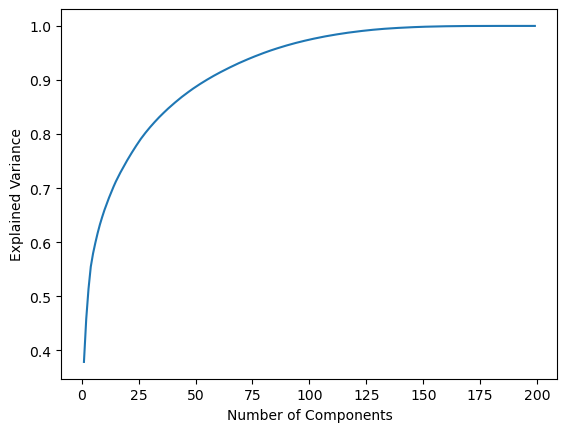

In [17]:
# Perform PCA
pca = PCA()
pca.fit(correlation_matrix)

# Plot explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()


# Find correlated pairs & drop one of each pair

In [18]:
# Set the correlation threshold
correlation_threshold =0.9

# Find correlated variable pairs
correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j],abs(correlation_matrix.iloc[i, j])))

print("Correlated variable pairs:")
for pair in correlated_pairs:
    print(pair)

Correlated variable pairs:
('RoofStyle_Gable', 'RoofStyle_Hip', 0.9334615823692307)
('Exterior1st_CBlock', 'Exterior2nd_CBlock', 1.0)
('Exterior1st_CemntBd', 'Exterior2nd_CmentBd', 0.9741710841939724)
('Exterior1st_MetalSd', 'Exterior2nd_MetalSd', 0.9730651937625319)
('Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 0.9775248873036357)
('SaleType_New', 'SaleCondition_Partial', 0.9868189596845142)


In [19]:
for pair in correlated_pairs:
    encoded_df=encoded_df.drop(pair[0],axis=1)

In [20]:
encoded_df.shape

(1460, 193)

# LassoCV & Lasso for features selection

In [21]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
X=encoded_df.drop('SalePrice',axis=1)
y=encoded_df['SalePrice']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
alphas = alphas = np.logspace(-4, 2, 200)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
selected_alpha = lasso_cv.alpha_
lasso_cv_score = lasso_cv.score(X_test, y_test)
print(lasso_cv_score ,selected_alpha )

0.864305368663353 100.0


In [23]:
# Initialize Lasso model
lasso = Lasso(alpha=selected_alpha)  # 'alpha' controls the strength of regularization

# Fit the Lasso model on the training data
lasso.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Get selected features (features with non-zero coefficients)
selected_features = X.columns[coefficients != 0]

# Evaluate the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.864305368663353

In [24]:
len(selected_features)

97

# Drop no-selected features

In [25]:
for col in encoded_df.columns:
    if col not in selected_features and col!='SalePrice':
        encoded_df=encoded_df.drop(col,axis=1)

In [26]:
encoded_df.shape

(1460, 98)

In [27]:
encoded_df

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,MasVnrType_BrkFace,MasVnrType_None,Foundation_CBlock,Foundation_PConc,GarageType_Attchd,GarageType_BuiltIn,SaleType_WD,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
0,5.0,-0.229372,-0.207142,3.0,3.0,0.0,6.0,4.0,1.050994,0.878668,...,1,0,0,1,1,0,1,0,1,0
1,0.0,0.451936,-0.091886,3.0,3.0,0.0,5.0,7.0,0.156734,-0.429577,...,0,1,1,0,1,0,1,0,1,0
2,5.0,-0.093110,0.073480,0.0,3.0,0.0,6.0,4.0,0.984752,0.830215,...,1,0,0,1,1,0,1,0,1,0
3,6.0,-0.456474,-0.096897,0.0,3.0,0.0,6.0,4.0,-1.863632,-0.720298,...,0,1,0,0,0,0,1,0,0,0
4,5.0,0.633618,0.375148,0.0,3.0,0.0,7.0,4.0,0.951632,0.733308,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5.0,-0.365633,-0.260560,3.0,3.0,0.0,5.0,4.0,0.918511,0.733308,...,0,1,0,1,1,0,1,0,1,0
1456,0.0,0.679039,0.266407,3.0,3.0,0.0,5.0,5.0,0.222975,0.151865,...,0,0,1,0,1,0,1,0,1,0
1457,6.0,-0.183951,-0.147810,3.0,3.0,0.0,6.0,8.0,-1.002492,1.024029,...,0,1,0,0,1,0,1,0,1,0
1458,0.0,-0.093110,-0.080160,3.0,3.0,0.0,4.0,5.0,-0.704406,0.539493,...,0,1,1,0,1,0,1,0,1,0


# feature_importances with RandomForestClassifier

In [28]:
X=encoded_df.drop('SalePrice',axis=1)
y=encoded_df['SalePrice']
# Fit a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Créez une liste de tuples (nom de la fonctionnalité, importance)
feature_importance_tuples = [(feature_name, importance) for feature_name, importance in zip(X.columns, feature_importances)]

# Triez la liste en fonction des importances (décroissant)
feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)

# Imprimez les noms de fonctionnalités et leurs importances
for feature_name, importance in feature_importance_tuples[:10]:
    print(f"{feature_name}: {importance}")

LotArea: 0.04153793989575776
GrLivArea: 0.04127236331514383
BsmtUnfSF: 0.03965954926194227
GarageArea: 0.039486312160377575
LotFrontage: 0.03670534443527925
GarageYrBlt: 0.034350965222528
YearBuilt: 0.03419078074956296
MoSold: 0.033519309044628035
BsmtFinSF1: 0.03247512216108541
YearRemodAdd: 0.03247162845422078


In [29]:
# Sélectionnez les trois fonctionnalités les plus importantes
top_feature_names = [feature_name for feature_name, _ in feature_importance_tuples[:3]]

In [30]:
top_feature_names.append('SalePrice')

# Construction of the first version dataframe with 3 top_features

In [31]:
df_version_1=encoded_df[top_feature_names]

In [32]:
#df_version_1=df_version_1.drop('TotalBsmtSF',axis=1)

In [33]:
corr_matrix_1=df_version_1.corr()

In [34]:
corr_matrix_1

,LotArea,GrLivArea,BsmtUnfSF,SalePrice
LotArea,1.000000,0.263116,-0.002618,0.263843
GrLivArea,0.263116,1.000000,0.240257,0.708624
BsmtUnfSF,-0.002618,0.240257,1.000000,0.214479
SalePrice,0.263843,0.708624,0.214479,1.000000


In [35]:
# Supprimez les trois fonctionnalités les plus importantes de feature_importance_tuples
feature_importance_tuples = [item for item in feature_importance_tuples if item[0] not in top_feature_names]

In [36]:
feature_importance_tuples[:7]

[('GarageArea', 0.039486312160377575),
 ('LotFrontage', 0.03670534443527925),
 ('GarageYrBlt', 0.034350965222528),
 ('YearBuilt', 0.03419078074956296),
 ('MoSold', 0.033519309044628035),
 ('BsmtFinSF1', 0.03247512216108541),
 ('YearRemodAdd', 0.03247162845422078)]

# Build the first regression model (LinearRegression) & evaluate it 

In [37]:
# Séparer les données en fonctionnalités (X) et cible (y)
X = df_version_1.drop('SalePrice', axis=1)
y = df_version_1['SalePrice']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un modèle de régression linéaire
model_reg = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_train= model_reg.predict(X_train)
y_pred = model_reg.predict(X_test)
# Calculer la métrique d'évaluation (par exemple, l'erreur quadratique moyenne)
r2_train=r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
print(f"r2_score train: {r2_train}")
print(f"r2_score test: {r2_test}")

r2_score train: 0.4871229956075116
r2_score test: 0.5520826103621692


# Try other model SVR 
# RandomizedSearchCV for find optimal values of SVR params

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_grid = {
    'C': expon(scale=100),  # Distribué exponentiellement avec une échelle de 100
    'epsilon': reciprocal(0.01, 1)  # Distribué de manière réciproque entre 0.01 et 1
}

Random_search = RandomizedSearchCV(SVR(kernel='linear'), param_grid, cv=5)
Random_search.fit(X_train, y_train)

best_params = Random_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'C': 199.35271177567722, 'epsilon': 0.012309401995353929}


In [39]:
c=best_params['C']
epsilon=best_params['epsilon']

# Train & test & evaluate SVR

In [40]:
model = SVR(kernel='linear', C=c, epsilon=epsilon)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_train= model.predict(X_train)
y_pred = model.predict(X_test)
# Calculer la métrique d'évaluation (par exemple, l'erreur quadratique moyenne)
r2_train=r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
print(f"r2_score train: {r2_train}")
print(f"r2_score test: {r2_test}")

r2_score train: 0.459170875026055
r2_score test: 0.4852829211802214


# RandomForestRegressor an other model
# OOB for the best value of n_estimators

In [41]:
estimators_range = np.arange(10, 1000, 50)  # Adjust the step size according to your preference
oob_scores = []

for n_estimators in estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    oob_scores.append(model.oob_score_)

best_n_estimators = estimators_range[np.argmax(oob_scores)]
print(f"Best n_estimators: {best_n_estimators}")

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Best n_estimators: 710


 # Cross-validationn 

In [42]:
model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Use 'neg_mean_squared_error' for Mean Squared Error
# Print the R² scores for each fold
print("R² Scores:", scores)
print("Mean R²:", scores.mean())
# Entraîner le modèle sur l'ensemble d'entraînement

model.fit(X_train, y_train)

y_pred_train= model.predict(X_train)
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

r2_train=r2_score(y_train, y_pred_train)
# Calculer la métrique d'évaluation (par exemple, l'erreur quadratique moyenne)
r2_test = r2_score(y_test, y_pred)
print(f"r2_score train: {r2_train}")
print(f"r2_score test: {r2_test}")

R² Scores: [0.61898255 0.48871509 0.6066191  0.50000335 0.48923935]
Mean R²: 0.5407118889862433
r2_score train: 0.9312078882088906
r2_score test: 0.6411399989414704


# Add features from top_features to deal with overfitting 

In [43]:
feature_importance_tuples[:16]

[('GarageArea', 0.039486312160377575),
 ('LotFrontage', 0.03670534443527925),
 ('GarageYrBlt', 0.034350965222528),
 ('YearBuilt', 0.03419078074956296),
 ('MoSold', 0.033519309044628035),
 ('BsmtFinSF1', 0.03247512216108541),
 ('YearRemodAdd', 0.03247162845422078),
 ('OpenPorchSF', 0.028002645475980522),
 ('WoodDeckSF', 0.027276465171318712),
 ('YrSold', 0.024239034161078598),
 ('TotRmsAbvGrd', 0.023378499436048517),
 ('MasVnrArea', 0.02261376342030104),
 ('2ndFlrSF', 0.021930494822250683),
 ('OverallQual', 0.019885411543179764),
 ('BsmtFinType1', 0.018150497268871694),
 ('OverallCond', 0.017325130935095065)]

In [44]:
# Sélectionnez les trois fonctionnalités les plus importantes
top_feature_names_2 = [feature_name for feature_name, _ in feature_importance_tuples[:16]]

In [45]:
top_feature_names_2

['GarageArea',
 'LotFrontage',
 'GarageYrBlt',
 'YearBuilt',
 'MoSold',
 'BsmtFinSF1',
 'YearRemodAdd',
 'OpenPorchSF',
 'WoodDeckSF',
 'YrSold',
 'TotRmsAbvGrd',
 'MasVnrArea',
 '2ndFlrSF',
 'OverallQual',
 'BsmtFinType1',
 'OverallCond']

In [46]:
df_version_2=pd.concat([df_version_1,encoded_df[top_feature_names_2]],axis=1)

In [47]:
df_version_2

,LotArea,GrLivArea,BsmtUnfSF,SalePrice,GarageArea,LotFrontage,GarageYrBlt,YearBuilt,MoSold,BsmtFinSF1,YearRemodAdd,OpenPorchSF,WoodDeckSF,YrSold,TotRmsAbvGrd,MasVnrArea,2ndFlrSF,OverallQual,BsmtFinType1,OverallCond
0,-0.207142,0.370333,-0.944591,208500.0,0.351000,-0.229372,1.021157,1.050994,-1.599111,0.575425,0.878668,0.216503,-0.752176,0.138777,0.912210,0.511418,1.161852,6.0,2.0,4.0
1,-0.091886,-0.482512,-0.641228,181500.0,-0.060731,0.451936,-0.104483,0.156734,-0.489110,1.171992,-0.429577,-0.704483,1.626195,-0.614439,-0.318683,-0.574410,-0.795163,5.0,0.0,7.0
2,0.073480,0.515013,-0.301643,223500.0,0.631726,-0.093110,0.937776,0.984752,0.990891,0.092907,0.830215,-0.070361,-0.752176,0.138777,-0.318683,0.323060,1.189351,6.0,2.0,4.0
3,-0.096897,0.383659,-0.061670,140000.0,0.790804,-0.456474,0.812705,-1.863632,-1.599111,-0.499274,-0.720298,-0.176048,-0.752176,-1.367655,0.296763,-0.574410,0.937276,6.0,0.0,4.0
4,0.375148,1.299326,-0.174865,250000.0,1.698485,0.633618,0.896086,0.951632,2.100892,0.463568,0.733308,0.563760,0.780197,0.138777,1.527656,1.364570,1.617877,7.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,0.250402,0.873321,175000.0,-0.060731,-0.365633,0.854395,0.918511,0.620891,-0.973018,0.733308,-0.100558,-0.752176,-0.614439,0.296763,-0.574410,0.795198,5.0,5.0,4.0
1456,0.266407,1.061367,0.049262,210000.0,0.126420,0.679039,-0.021102,0.222975,-1.599111,0.759659,0.151865,-0.704483,2.033231,1.645210,0.296763,0.084843,-0.795163,5.0,0.0,5.0
1457,-0.147810,1.569647,0.701265,266500.0,-1.033914,-0.183951,-1.563645,-1.002492,-0.489110,-0.369871,1.024029,0.201405,-0.752176,1.645210,1.527656,-0.574410,1.844744,6.0,2.0,8.0
1458,-0.080160,-0.832788,-1.284176,142125.0,-1.090059,-0.093110,-1.188432,-0.704406,-0.859110,-0.865548,0.539493,-0.704483,2.168910,1.645210,-0.934130,-0.574410,-0.795163,4.0,2.0,5.0


In [48]:
corr_matrix_2=df_version_2.drop('SalePrice',axis=1).corr()

In [49]:
corr_matrix_2

,LotArea,GrLivArea,BsmtUnfSF,GarageArea,LotFrontage,GarageYrBlt,YearBuilt,MoSold,BsmtFinSF1,YearRemodAdd,OpenPorchSF,WoodDeckSF,YrSold,TotRmsAbvGrd,MasVnrArea,2ndFlrSF,OverallQual,BsmtFinType1,OverallCond
LotArea,1.000000,0.263116,-0.002618,0.180403,0.306795,-0.024812,0.014228,0.001205,0.214103,0.013788,0.084774,0.171698,-0.014261,0.190015,0.103960,0.050986,0.105806,-0.061880,-0.005636
GrLivArea,0.263116,1.000000,0.240257,0.468997,0.368392,0.221977,0.199010,0.050240,0.208171,0.287389,0.330224,0.247433,-0.036526,0.825489,0.389893,0.687501,0.593007,0.073549,-0.079686
BsmtUnfSF,-0.002618,0.240257,1.000000,0.183303,0.122156,0.186098,0.149040,0.034888,-0.495251,0.181133,0.129005,-0.005316,-0.041258,0.250647,0.114184,0.004469,0.308159,0.458617,-0.136841
GarageArea,0.180403,0.468997,0.183303,1.000000,0.323663,0.476498,0.478954,0.027974,0.296970,0.371600,0.241435,0.224666,-0.027378,0.337822,0.372567,0.138347,0.562022,-0.061119,-0.151521
LotFrontage,0.306795,0.368392,0.122156,0.323663,1.000000,0.064324,0.117598,0.010158,0.215828,0.082746,0.137454,0.077106,0.006768,0.320146,0.179283,0.072483,0.234196,-0.025233,-0.052820
GarageYrBlt,-0.024812,0.221977,0.186098,0.476498,0.064324,1.000000,0.780555,0.005173,0.150338,0.618130,0.218490,0.220623,-0.000987,0.140791,0.249367,0.069315,0.518018,-0.034221,-0.306169
YearBuilt,0.014228,0.199010,0.149040,0.478954,0.117598,0.780555,1.000000,0.012398,0.249503,0.592855,0.188686,0.224880,-0.013618,0.095589,0.314745,0.010308,0.572323,-0.141327,-0.375983
MoSold,0.001205,0.050240,0.034888,0.027974,0.010158,0.005173,0.012398,1.000000,-0.015727,0.021490,0.071255,0.021011,-0.145721,0.036907,-0.005940,0.035164,0.070815,0.037916,-0.003511
BsmtFinSF1,0.214103,0.208171,-0.495251,0.296970,0.215828,0.150338,0.249503,-0.015727,1.000000,0.128451,0.111761,0.204306,0.014359,0.044316,0.263582,-0.137079,0.239666,-0.570973,-0.046231
YearRemodAdd,0.013788,0.287389,0.181133,0.371600,0.082746,0.618130,0.592855,0.021490,0.128451,1.000000,0.226298,0.205726,0.035743,0.191740,0.179186,0.140024,0.550684,-0.023888,0.073741


In [50]:
# Set the correlation threshold
correlation_threshold =0.6

# Find correlated variable pairs
correlated_pairs = []
for i in range(len(corr_matrix_2.columns)):
    for j in range(i + 1, len(corr_matrix_2.columns)):
        if abs(corr_matrix_2.iloc[i, j]) >= correlation_threshold:
            correlated_pairs.append((corr_matrix_2.columns[i], corr_matrix_2.columns[j],abs(corr_matrix_2.iloc[i, j])))

print("Correlated variable pairs:")
for pair in correlated_pairs:
    print(pair)

Correlated variable pairs:
('GrLivArea', 'TotRmsAbvGrd', 0.8254893743088426)
('GrLivArea', '2ndFlrSF', 0.6875010641666043)
('GarageYrBlt', 'YearBuilt', 0.7805549935309498)
('GarageYrBlt', 'YearRemodAdd', 0.6181298421366529)
('TotRmsAbvGrd', '2ndFlrSF', 0.6164226354915432)


In [51]:
df_version_2=df_version_2.drop(['GarageYrBlt','YearRemodAdd'],axis=1)

In [52]:
feature_importance_tuples = [item for item in feature_importance_tuples if item[0] not in top_feature_names_2]

In [53]:
feature_importance_tuples[:9]

[('BedroomAbvGr', 0.016113280221267914),
 ('MSSubClass', 0.015933001784538423),
 ('BsmtExposure', 0.014631324921503062),
 ('Fireplaces', 0.013588406072414658),
 ('HeatingQC', 0.01286208317445564),
 ('LotShape', 0.011738829915981994),
 ('GarageCars', 0.011019292305441535),
 ('BsmtFullBath', 0.010599191874017146),
 ('EnclosedPorch', 0.010558502072651441)]

In [54]:
# Séparer les données en fonctionnalités (X) et cible (y)
X = df_version_2.drop('SalePrice', axis=1)
y = df_version_2['SalePrice']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un modèle de régression linéaire
model_reg = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_train= model_reg.predict(X_train)
y_pred = model_reg.predict(X_test)
# Calculer la métrique d'évaluation (par exemple, l'erreur quadratique moyenne)
r2_train=r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
print(f"r2_score train: {r2_train}")
print(f"r2_score test: {r2_test}")

r2_score train: 0.7708032531541353
r2_score test: 0.8213098823284926


In [55]:
estimators_range = np.arange(10, 1000, 50)  # Adjust the step size according to your preference
oob_scores = []

for n_estimators in estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    oob_scores.append(model.oob_score_)

best_n_estimators = estimators_range[np.argmax(oob_scores)]
print(f"Best n_estimators: {best_n_estimators}")

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Best n_estimators: 860


In [56]:
model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R² Scores:", scores)
print("Mean R²:", scores.mean())
model.fit(X_train, y_train)
y_pred_train= model.predict(X_train)
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
r2_train=r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
print(f"r2_score train: {r2_train}")
print(f"r2_score test: {r2_test}")

R² Scores: [0.87221554 0.85810223 0.85858198 0.87071816 0.77643116]
Mean R²: 0.8472098149724072
r2_score train: 0.9760202081087894
r2_score test: 0.8914657142548039
